# Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib as mpl
mpl.style.use("seaborn")


# Analisando os erros de sintaxe

## Montando o DataFrame com os erros de sintaxe

In [2]:
nome_exercicio="gaussiana"

In [3]:
json_results= "exercicios/analise-exercicios/"+ nome_exercicio + "/resultado_detalhado.json"
json_results

'exercicios/analise-exercicios/gaussiana/resultado_detalhado.json'

In [4]:
df_exs = pd.read_json(json_results, orient='records')
df_exs = df_exs.rename(columns = {'id':'id','erros':'tipo_do_erro', 'resultado':'passou', 'detalhes':'erro'})


In [5]:
#df_exs=df_exs.set_index('id')
df_exs.tail(4)

,erro,tipo_do_erro,id,linha,passou
2313,"b = exp((-0,5(((x-m)/s)**2)\n",SyntaxError: invalid syntax,ch3_2020_03_04_20_08_39_273348.py,5,False
2314,def x,SyntaxError: invalid syntax,ch3_2019_09_11_23_12_24_127271.py,1,False
2315,B = math.e0.5*x-mi)/sigma)2),SyntaxError: invalid syntax,ch3_2020_03_04_19_49_40_592877.py,4,False
2316,,AssertionError: <|><Verificar quando x ou mi é...,ch3_2020_09_04_16_47_36_060892.py,,False


In [6]:
df_erros=df_exs[df_exs['passou']==False]

df_erros.head()

,erro,tipo_do_erro,id,linha,passou
1,y=1/σ*2import.pi)**1/2)import exp-0.5x-μ)/...,SyntaxError: invalid syntax,ch3_2019_08_13_16_52_03_378932.py,3,False
2,,TypeError: \'float\' object is not callable,ch3_2020_03_09_19_11_49_185208.py,,False
3,if x,SyntaxError: invalid syntax,ch3_2020_02_28_17_44_32_436097.py,3,False
4,y=1/sigma*2*math.pi)**0.5)math.e**-0.5*x-m...,SyntaxError: invalid syntax,ch3_2019_03_01_12_59_50_648548.py,3,False
5,,TypeError: \'float\' object is not callable,ch3_2020_02_20_00_11_13_695953.py,,False


In [7]:
df_sintaxe = df_erros[df_erros['tipo_do_erro'].str.contains("SyntaxError", na=False)]
df_sintaxe

,erro,tipo_do_erro,id,linha,passou
1,y=1/σ*2import.pi)**1/2)import exp-0.5x-μ)/...,SyntaxError: invalid syntax,ch3_2019_08_13_16_52_03_378932.py,3,False
3,if x,SyntaxError: invalid syntax,ch3_2020_02_28_17_44_32_436097.py,3,False
4,y=1/sigma*2*math.pi)**0.5)math.e**-0.5*x-m...,SyntaxError: invalid syntax,ch3_2019_03_01_12_59_50_648548.py,3,False
7,"print(calcula_gaussiana(0,0,1))",SyntaxError: invalid syntax,ch3_2020_03_18_23_48_15_310305.py,10,False
11,return 0\n,SyntaxError: unexpected EOF while parsing,ch3_2019_03_30_20_28_09_678811.py,5,False
17,"from import math e, sqrt, pi",SyntaxError: invalid syntax,ch3_2020_03_09_13_49_29_497280.py,1,False
23,Import numpy as np,SyntaxError: invalid syntax,ch3_2020_09_21_18_42_03_389570.py,1,False
24,"print calcula_gaussiana(10, 12, 11)",SyntaxError: invalid syntax,ch3_2020_08_04_15_47_57_054802.py,5,False
26,f=1/σ*2* math.pi)**1/2))*math.exp-0.5*x-μ)...,SyntaxError: invalid syntax,ch3_2019_08_12_17_09_58_433774.py,3,False
32,"g=(1/sigma*(2pi)**(-1/2)*e**(0,5((x-mi)/sig...",SyntaxError: invalid syntax,ch3_2020_09_29_19_01_20_963868.py,2,False


In [52]:
df_sintaxe["possivel_solucao"]="--"

In [53]:
df_sintaxe.head()

,erro,tipo_do_erro,id,linha,passou,possivel_solucao
1,y=1/σ*2import.pi)**1/2)import exp-0.5x-μ)/...,SyntaxError: invalid syntax,ch3_2019_08_13_16_52_03_378932.py,3,False,--
3,if x,SyntaxError: invalid syntax,ch3_2020_02_28_17_44_32_436097.py,3,False,--
4,y=1/sigma*2*math.pi)**0.5)math.e**-0.5*x-m...,SyntaxError: invalid syntax,ch3_2019_03_01_12_59_50_648548.py,3,False,--
7,"print(calcula_gaussiana(0,0,1))",SyntaxError: invalid syntax,ch3_2020_03_18_23_48_15_310305.py,10,False,--
11,return 0\n,SyntaxError: unexpected EOF while parsing,ch3_2019_03_30_20_28_09_678811.py,5,False,--


## Adicionando os IDs dos usuários ao dataframe

In [10]:
import os

def list_files(dir):
    r = []
    for root, dirs, files in os.walk(dir):
        for name in files:
            r.append(os.path.join(root, name))
    return r

In [11]:
dir = r"C:\Users\gabic\Documents\NINJA_DeSoft\submissoes_servidor\backup"
files = list_files(dir)

In [12]:
lista_files = []
for f in files:
    f = f[65:]
    f.replace("//","/")
    lista_files.append(f)
    
lista_files= lista_files[1:]

In [14]:
df_sintaxe["usuario"]="--"
for ind in df_sintaxe.index: 
        for l in lista_files:
            user = l[0:8]
            ex = l[9:]
            if ex == df_sintaxe["id"][ind]:
                df_sintaxe["usuario"][ind] = user
#                 print(user)
#                 print(ex)


In [47]:
df_sintaxe

,detalhes,tipo_do_erro,id,linha,passou
1,[('line 3\n y=((1/σ*(2import.pi)**1/2)impor...,SyntaxError: invalid syntax,ch3_2019_08_13_16_52_03_378932.py,3,False
3,[('line 3\n if x\n ^\nSyntaxError: in...,SyntaxError: invalid syntax,ch3_2020_02_28_17_44_32_436097.py,3,False
4,[('line 3\n y=1/(sigma*(2*math.pi)**0.5)mat...,SyntaxError: invalid syntax,ch3_2019_03_01_12_59_50_648548.py,3,False
7,[1))\n ^\nSyntaxError: invalid syntax\n'],SyntaxError: invalid syntax,ch3_2020_03_18_23_48_15_310305.py,10,False
11,[ line 6\n return (1/sigma*math.sqrt(2*math...,SyntaxError: unexpected EOF while parsing,ch3_2019_03_30_20_28_09_678811.py,5,False
17,[ pi\n ^\nSyntaxError: invalid sy...,SyntaxError: invalid syntax,ch3_2020_03_09_13_49_29_497280.py,1,False
23,[('line 1\n Import numpy as np\n ...,SyntaxError: invalid syntax,ch3_2020_09_21_18_42_03_389570.py,1,False
24,[ 11)\n ^\nSyntaxErro...,SyntaxError: invalid syntax,ch3_2020_08_04_15_47_57_054802.py,5,False
26,[('line 3\n f=(1/σ*(2* math.pi)**(1/2))*mat...,SyntaxError: invalid syntax,ch3_2019_08_12_17_09_58_433774.py,3,False
32,[5((x-mi)/sigma)*2)\n ^\nSynt...,SyntaxError: invalid syntax,ch3_2020_09_29_19_01_20_963868.py,2,False


# Analisando e classificando os erros

In [54]:
def find_between( s, first, last ):
    try:
        start = s.index( first ) + len( first )
        end = s.index( last, start )
        return s[start:end]
    except ValueError:
        return ""


In [55]:
df_sintaxe.dtypes

erro                object
tipo_do_erro        object
id                  object
linha               object
passou                bool
possivel_solucao    object
dtype: object

In [56]:
df_sintaxe["erro"][1]

'    y=1/σ*2import.pi)**1/2)import exp-0.5x-μ)/σ)**2)'

In [57]:
for ind in df_sintaxe.index: 
    line = str( df_sintaxe["linha"][ind] )
    det = df_sintaxe["detalhes"][ind]
#     print(det)
#     det=str(det)
#     df_sintaxe["linha"][ind]=line
#     line=str(line)
    if "(" in line:
        line=line.replace("(","")  
        df_sintaxe["linha"][ind]=line

#     error=df_sintaxe["erros"][ind]
    if len(line)>4:
        df_sintaxe["linha"][ind]= "--"
        
        
#     print(det)
    for x in det:
#         print(x)
        x=x.replace("\\n","")
        x=x.replace("   ^","")
        

        if "SyntaxError" in x:
            detail=x[x.index("SyntaxError:") + len("SyntaxError:"):]
            detail=detail.replace("'", "")
            detail=detail.replace(")", "")
            df_sintaxe["detalhes"][ind]=detail


KeyError: 'detalhes'

In [58]:
df_sintaxe

,erro,tipo_do_erro,id,linha,passou,possivel_solucao
1,y=1/σ*2import.pi)**1/2)import exp-0.5x-μ)/...,SyntaxError: invalid syntax,ch3_2019_08_13_16_52_03_378932.py,3,False,--
3,if x,SyntaxError: invalid syntax,ch3_2020_02_28_17_44_32_436097.py,3,False,--
4,y=1/sigma*2*math.pi)**0.5)math.e**-0.5*x-m...,SyntaxError: invalid syntax,ch3_2019_03_01_12_59_50_648548.py,3,False,--
7,"print(calcula_gaussiana(0,0,1))",SyntaxError: invalid syntax,ch3_2020_03_18_23_48_15_310305.py,10,False,--
11,return 0\n,SyntaxError: unexpected EOF while parsing,ch3_2019_03_30_20_28_09_678811.py,5,False,--
17,"from import math e, sqrt, pi",SyntaxError: invalid syntax,ch3_2020_03_09_13_49_29_497280.py,1,False,--
23,Import numpy as np,SyntaxError: invalid syntax,ch3_2020_09_21_18_42_03_389570.py,1,False,--
24,"print calcula_gaussiana(10, 12, 11)",SyntaxError: invalid syntax,ch3_2020_08_04_15_47_57_054802.py,5,False,--
26,f=1/σ*2* math.pi)**1/2))*math.exp-0.5*x-μ)...,SyntaxError: invalid syntax,ch3_2019_08_12_17_09_58_433774.py,3,False,--
32,"g=(1/sigma*(2pi)**(-1/2)*e**(0,5((x-mi)/sig...",SyntaxError: invalid syntax,ch3_2020_09_29_19_01_20_963868.py,2,False,--


In [34]:
erro_import=0
erro_antes_do_return=0
erro_parenteses=0
erro_potencia=0
erro_if=0
erro_while=0
erro_for=0
erro_def=0
erro_pi=0
erro_vezes=0

In [35]:
lista_tipos_erros=[]
for ind in df_sintaxe.index: 
    sol='--'
    erro = df_sintaxe["erro"][ind]
    erro=str(erro)
    
#     if "return" in erro and len(erro)<30:
#         sol="Verifique a linha antes do return"
#         erro_antes_do_return+=1
    if "import" in erro or "Import" in erro:
        sol="Verifique a maneira com que está realizando o import"
        erro_import+=1
    if "(" in erro:
        abre_parenteses=erro.count('(')
        fecha_parenteses=erro.count(')')
        if abre_parenteses>fecha_parenteses:
            sol="Faltou fechar um parênteses"
        elif abre_parenteses<fecha_parenteses:
            sol="Faltou abrir um parênteses"
        erro_parenteses+=1
        
    if "^" in erro:
        sol="Potência em Python é: **"
        erro_potencia+=1
        
    if "if" in erro and ":" not in erro:
        sol="Faltou ':' na linha do 'if'"
        erro_if+=1
        
    if "while" in erro and ":" not in erro:
        sol="Faltou ':' na linha do 'while'"
        erro_while+=1
        
    if "for" in erro and ":" not in erro:
        sol="Faltou ':' na linha do 'for'"
        erro_for+=1
        
    if "def" in erro and ":" not in erro:
        sol="Faltou ':' na linha do 'def'"
        erro_def+=1
        
    if "π" in erro:
        sol="π é math.pi"
        erro_pi+=1
        
    if ")(" in erro:
        sol="esqueceu o sinal de *"
        erro_vezes+=1
        
    else:
        lista_tipos_erros.append(erro)
        
    df_sintaxe["possivel_solucao"][ind]= sol
        
    
        
    
    
    

In [36]:
lista_tipos_erros[0:20]

['    y=1/σ*2import.pi)**1/2)import exp-0.5x-μ)/σ)**2)',
 '    if x',
 '    y=1/sigma*2*math.pi)**0.5)math.e**-0.5*x-mi)/sigma)**2)',
 '   print(calcula_gaussiana(0,0,1))',
 '        return 0\n',
 '   from import math e, sqrt, pi',
 '    Import numpy as np',
 '   print calcula_gaussiana(10, 12, 11)',
 '    f=1/σ*2* math.pi)**1/2))*math.exp-0.5*x-μ)/σ)**2):',
 '   g=(1/sigma*(2pi)**(-1/2)*e**(0,5((x-mi)/sigma)*2)',
 '    f(x,μ,σ) =(1/(σ*((2*math.pi)**0.5))**(-0.5*((x-μ)/+σ)**2)\n',
 "')",
 "')",
 '    calculo = (1/(sigma*(2*math.pi)**(1/2))*math.e**(-0,5*((x-mi)/sigma)**2)\n',
 '    y = (1/sigma*(2*math.pi)**(1/2))*math.e**((-0.5)*(((x-mi)/sigma)**2)\n',
 '    resultado = (1/(z*sqrt(2*math.pi))**((-0.5*((x-y)/σ)**2))\n',
 'def calcula_gaussiana(x,μ,σ):\n',
 '    a = y * z',
 '   b=2,71**(-0.5*((x-mi)/sigma)**2)',
 '    y = (1/sigma*(2*math.pi)**(0.5)*math.exp((-0.5)*((x-mi)/sigma)**2)\n']

In [37]:
erros = {'tipos': ["erro_import", "erro_antes_do_return", "erro_parenteses", "erro_potencia", "erro_if", "erro_while", "erro_for", "erro_def", "erro_pi", "erro_vezes"],
        'quantidade': [erro_import,erro_antes_do_return,erro_parenteses,erro_potencia,erro_if, erro_while,erro_for, erro_def, erro_pi,erro_vezes]
        }

df_classificacao = pd.DataFrame(erros, columns = ['tipos', 'quantidade'])


In [38]:
df_sintaxe

,erro,tipo_do_erro,id,linha,passou,possivel_solucao
1,y=1/σ*2import.pi)**1/2)import exp-0.5x-μ)/...,SyntaxError: invalid syntax,ch3_2019_08_13_16_52_03_378932.py,3,False,Verifique a maneira com que está realizando o ...
3,if x,SyntaxError: invalid syntax,ch3_2020_02_28_17_44_32_436097.py,3,False,Faltou ':' na linha do 'if'
4,y=1/sigma*2*math.pi)**0.5)math.e**-0.5*x-m...,SyntaxError: invalid syntax,ch3_2019_03_01_12_59_50_648548.py,3,False,--
7,"print(calcula_gaussiana(0,0,1))",SyntaxError: invalid syntax,ch3_2020_03_18_23_48_15_310305.py,10,False,--
11,return 0\n,SyntaxError: unexpected EOF while parsing,ch3_2019_03_30_20_28_09_678811.py,5,False,--
17,"from import math e, sqrt, pi",SyntaxError: invalid syntax,ch3_2020_03_09_13_49_29_497280.py,1,False,Verifique a maneira com que está realizando o ...
23,Import numpy as np,SyntaxError: invalid syntax,ch3_2020_09_21_18_42_03_389570.py,1,False,Verifique a maneira com que está realizando o ...
24,"print calcula_gaussiana(10, 12, 11)",SyntaxError: invalid syntax,ch3_2020_08_04_15_47_57_054802.py,5,False,--
26,f=1/σ*2* math.pi)**1/2))*math.exp-0.5*x-μ)...,SyntaxError: invalid syntax,ch3_2019_08_12_17_09_58_433774.py,3,False,--
32,"g=(1/sigma*(2pi)**(-1/2)*e**(0,5((x-mi)/sig...",SyntaxError: invalid syntax,ch3_2020_09_29_19_01_20_963868.py,2,False,Faltou fechar um parênteses


In [39]:
df_classificacao.set_index("tipos")

,quantidade
tipos,
erro_import,41
erro_antes_do_return,0
erro_parenteses,353
erro_potencia,1
erro_if,8
erro_while,0
erro_for,5
erro_def,31
erro_pi,16


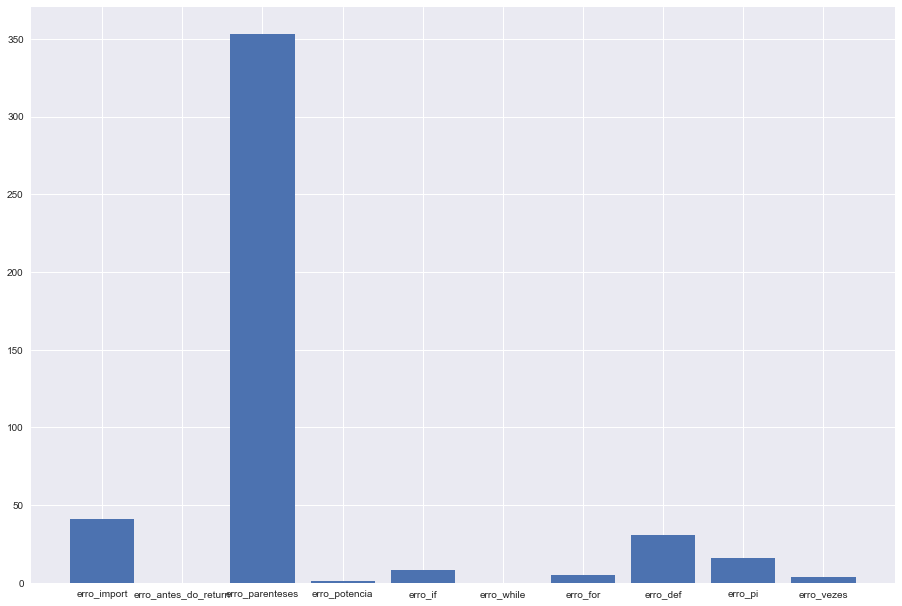

In [40]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_axes([0,0,1,1])
ax.bar(df_classificacao["tipos"], df_classificacao["quantidade"])
plt.show()

In [ ]:
# f, ax = plt.subplots(figsize = (32,20))
# plt.figure(figsize = (640,200))
erros = df_sintaxe["possivel_solucao"]
users = df_sintaxe["usuario"]
table = pd.crosstab(erros, users)
# plot=sns.heatmap(table,ax=ax, annot=True, cmap="YlGnBu")
# f.savefig("heatmap.png", dpi=200)
table

## Digite o ID de um usuário para descobrir seus principais erros

### Selecione o usuário:

In [ ]:
usuario = "user_086"

In [ ]:
table[usuario]

In [ ]:
errors = df_sintaxe.loc[df_sintaxe["usuario"]==usuario]
errors.loc[:, ["erro", "linha","linha","detalhes","possivel_solucao"]]